# From Statistical Physics to Data-Driven Modelling
         with Applications to Quantitative Biology
         
Tutorial 1:  Bayesian inference of the Diffusion Coefficient fron Single Particule Tracking. 


Based on artificial data generated by the authors.

Solution Notebook SC, RM, FZ

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Read the Data: 

In [7]:
#%matplotlib inline

#read time series t, x(t),y(t) generated with a drift D 
data=np.loadtxt('../Data/dataM1000d2.5.dat')

#read the number of data point from the data
M=np.size(data[:,1])


Question 1. Plot the trajectories in the (x,y) plane and the displacement  as a function of time.  Give a rough estimation of the diffusion coefficient from the data.


First estimate of D: 1.2030749624900892
Second estimate of D: 2.474673342340977


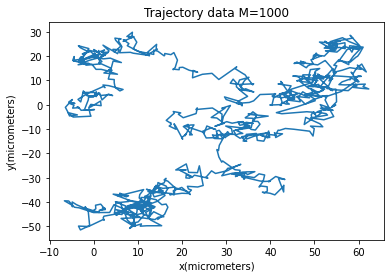

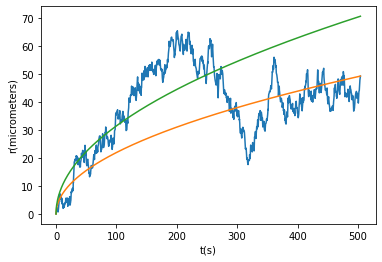

In [9]:
#compute one estimate of the Diffusion Coefficient D
r=np.sqrt(np.power(data[:,1],2)+np.power(data[:,2],2))
D0=np.power(r[M-1],2)/data[M-1,0]/4
print("First estimate of D:",D0)

#compute another estimate of the Diffusion Coefficient  D
diffdata=np.diff(data,axis=0)
dr2=(np.power(diffdata[:,1],2)+np.power(diffdata[:,2],2))/diffdata[:,0]
D1=np.mean(dr2)/4.
print("Second estimate of D:",D1)


# Plot the trajectory  
plt.plot(data[:,1],data[:,2])
plt.xlabel('x(micrometers)')
plt.ylabel('y(micrometers)')
plt.title('Trajectory data M=1000')
plt.savefig('trajectory_dataM1000d2_5.pdf')
plt.show()

#Plot separately the x and y and the displacement  r=sqrt(x^2+y^2) in function of the time  and
plt.plot(data[:,0],r)
plt.plot(data[:,0],np.sqrt(4*D0*data[:,0]))
plt.plot(data[:,0],np.sqrt(4*D1*data[:,0]))
plt.xlabel('t(s)')
plt.ylabel('r(micrometers)')
#plt.savefig('rvst_dataM1000d2_5.pdf')
plt.show()


Question 4: Compute and Plot the posterior distribution of the Diffusion Coefficient  D
    obtained from the three data files.

In [10]:
def posterior(namefile):
    data=np.loadtxt(namefile)
    #read the number of data point from the data
    M=np.size(data[:,1])
    diffdata=np.diff(data,axis=0)
    dr2=(np.power(diffdata[:,1],2)+np.power(diffdata[:,2],2))/diffdata[:,0]/4
    B=np.sum(dr2)
    #calculate the most probable value of the diffusion coefficient
    d0=B/(M-1)
    #calculate the average value of the diffusion coefficient (remember M-1 d*=B)
    d1=B/(M-3)
    #calculate the standard deviation of the diffusion coefficient
    d2=B/((M-3)*math.sqrt(M-4))
    print(M,d0,d1,d2)
    #compute posterior distribution
    dist=np.zeros((400,2))
    d=0
    for i in range(400):
        d=d+0.01
        dist[i,0]=d
        #dist[i,1]=np.exp(-b/d)*np.power(d,-N+1)*np.power(b,N-2)/(math.factorial(N-3))
        #for large N use stirling formula
        dist[i,1]=np.exp(-B/d-(M-1)*np.log(d)+(M-2)*np.log(B)+(M-3)*(1-np.log(M-3))-0.5*np.log(2*math.pi*(M-3)))
    return dist



Compute, for the given datasets, the values of the mean and of the variance of D, and its most likely value.

In [9]:
#Print the Number of data points M, the Maximum-likelihood 
#estimation of D, the average value and the standard deviation  
print("M Dmax Dav sigma")
dist10=posterior('../Data/dataM10d2.5.dat')
dist100=posterior('../Data/dataM100d2.5.dat')
dist1000=posterior('../Data/dataM1000d2.5.dat')

M Dmax Dav sigma
10 1.4369374069315348 1.847490951769116 0.754235022707197
100 2.413797302036949 2.4635663185737933 0.2514366845005259
1000 2.474673342340977 2.4796375817438676 0.07857032340314807


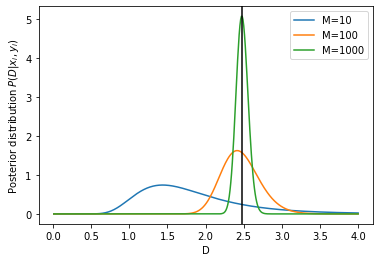

In [10]:
# Plot the Posterior Distribution of the Diffusion coefficient
plt.plot(dist10[:,0],dist10[:,1],label='M=10')
#plt.plot(distcheck10[:,0],distcheck10[:,1],label='M=10')
plt.plot(dist100[:,0],dist100[:,1],label='M=100')
plt.plot(dist1000[:,0],dist1000[:,1],label='M=1000')
plt.axvline(x=D1,color='black')
plt.legend()
plt.xlabel('D')
plt.ylabel('Posterior distribution $P(D|{x_i,y_i})$')
#plt.savefig('posteriordistD.pdf')
plt.show()
